#**Decision Tree for Classification to evaluate Customer acceptability of Cars**

**Dataset:** This Car evaluation dataset is taken from UCI Machine learning repository derived from simple hierarchical decision model.

**Task:** The key task is to evaluate Customer acceptability of Cars. The file car_evaluation.csv contains the dataset required to solve the task.

**Input Variables:**

* Buying price (vhigh, high, med, low)
* Price of the maintenance (vhigh, high, med, low)
* Number of doors (2, 3, 4, 5more)
* Persons capacity in terms of persons to carry (2, 4, more)
* Size of luggage boot (small, med, big)
* Estimated safety of the car (low, med, high)

**Output Variable:**
* Car acceptability (unacc, acc, good, vgood)


In [1]:
#importing the basic required libraries
import numpy as np
import pandas as pd

##**Reading data from the given data format(csv file):**

In [2]:
from google.colab import files 
uploaded= files.upload() #uploading the files

Saving car_evaluation.csv to car_evaluation.csv


In [3]:
import io
#creating dataframes from the csv file
df=pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']),header=None) 

In [4]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


##**Cleaning and Preparing the Data:**

###**Renaming the columns/variables  with meaningful column/variable names:**

In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [6]:
df.rename(columns={0:"Buying price"},inplace=True)
df.rename(columns={1:"Price of the maintenance"},inplace=True) 
df.rename(columns={2:"Number of doors"},inplace=True)
df.rename(columns={3:"Capacity"},inplace=True)
df.rename(columns={4:"The size of luggage boot"},inplace=True)
df.rename(columns={5:"Estimated safety of the car"},inplace=True)
df.rename(columns={6:"Customer Acceptability"},inplace=True)

In [7]:
df.head()

,Buying price,Price of the maintenance,Number of doors,Capacity,The size of luggage boot,Estimated safety of the car,Customer Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Buying price                 1728 non-null   object
 1   Price of the maintenance     1728 non-null   object
 2   Number of doors              1728 non-null   object
 3   Capacity                     1728 non-null   object
 4   The size of luggage boot     1728 non-null   object
 5   Estimated safety of the car  1728 non-null   object
 6   Customer Acceptability       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


All the variables are found to be of object type and are categorical.

In [9]:
df.describe()

,Buying price,Price of the maintenance,Number of doors,Capacity,The size of luggage boot,Estimated safety of the car,Customer Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,more,med,med,unacc
freq,432,432,432,576,576,576,1210


###**Checking for Missing values in the data:**

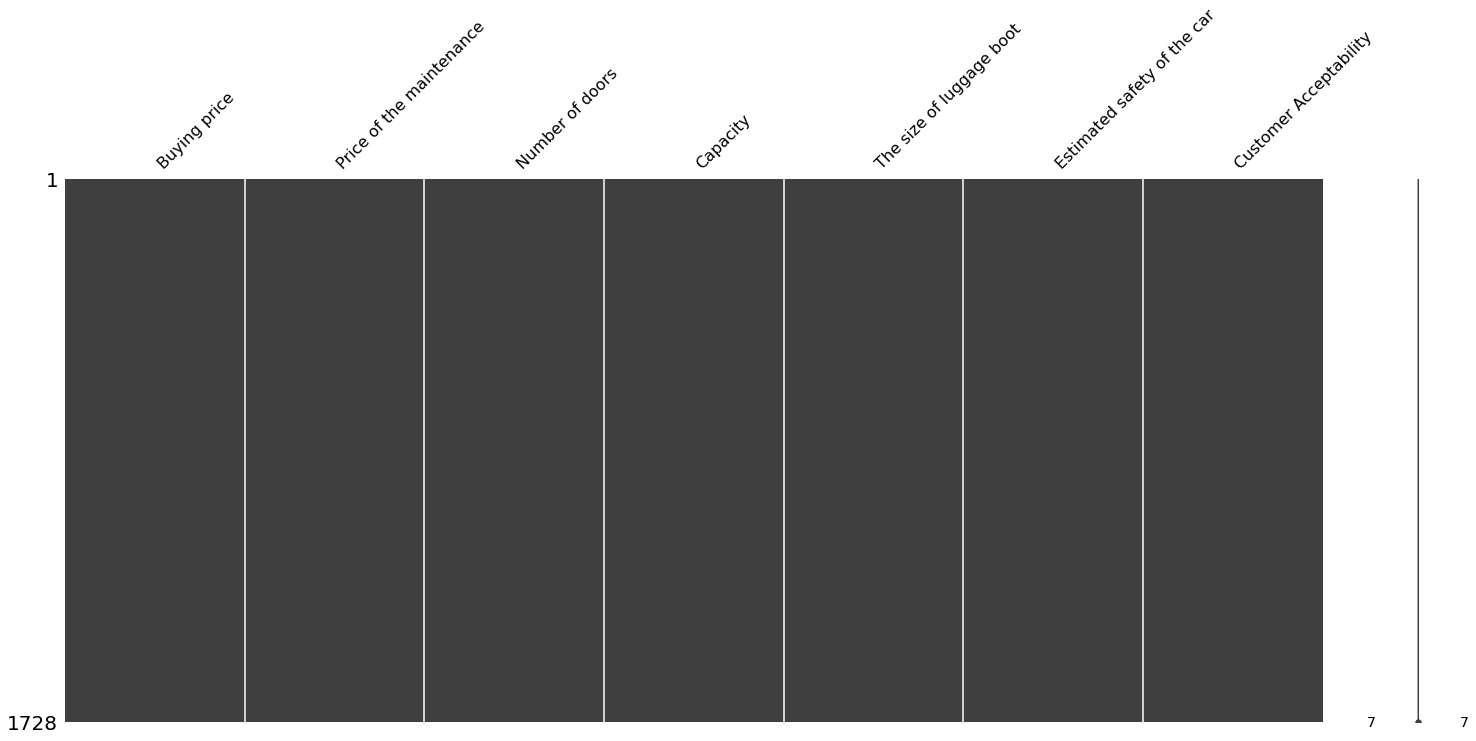

In [10]:
import missingno as msno 
msno.matrix(df) #visualizing the missing data/NaN values in the dataframe

**Inferance:**
* There are no NaN/missing values in the data

##**Exploratory Data Analysis and Visualization:**

In [36]:
#importing the libraries required for visualization
import os
import torch
import torchvision
from torch.utils.data import random_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mapping the categorical 'Customer Acceptability' variable to numerical ordinal levels:**

In [12]:
df['Customer Acceptability'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [13]:
df['Customer Acceptability'] = df['Customer Acceptability'].map({'unacc':0, 'acc':1, 'vgood':2, 'good':3})

**Exploratory Data Analysis and Visualization:**

Text(0, 0.5, 'Average Customer Acceptability level')

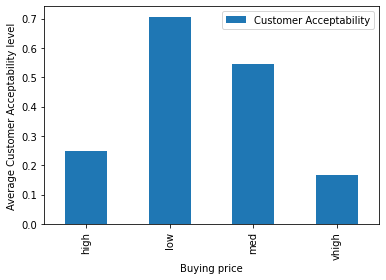

In [14]:
x=df[['Buying price', 'Customer Acceptability']].groupby('Buying price').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Buying price')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Lower the buying price, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

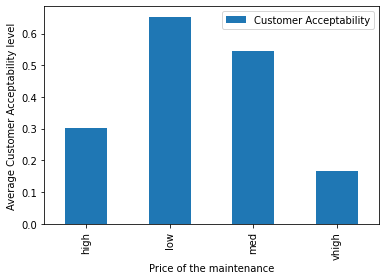

In [15]:
x=df[['Price of the maintenance', 'Customer Acceptability']].groupby('Price of the maintenance').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Price of the maintenance')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Lower the price of maintainance, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

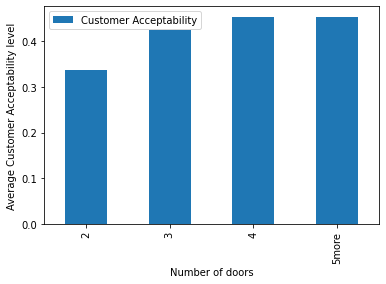

In [16]:
x=df[['Number of doors', 'Customer Acceptability']].groupby('Number of doors').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Number of doors')
plt.set_ylabel('Average Customer Acceptability level') 

**Inferance:**
* Higher the number of doors in the car, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

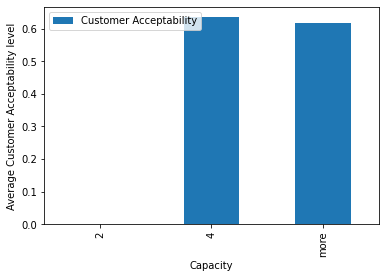

In [17]:
x=df[['Capacity', 'Customer Acceptability']].groupby('Capacity').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Capacity')
plt.set_ylabel('Average Customer Acceptability level') 

In [18]:
df[['Capacity', 'Customer Acceptability']].groupby('Capacity').mean()

,Customer Acceptability
Capacity,
2,0.000000
4,0.635417
more,0.616319


**Inferance:**
* Cars with a capacity of 2 have zero customer acceptability level.
* Cars with a capacity of 4 people was most preffered and had the highest average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

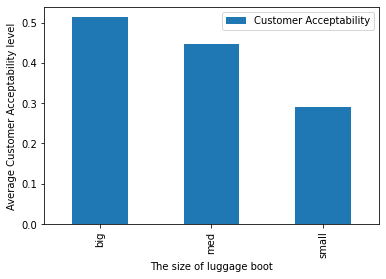

In [19]:
x=df[['The size of luggage boot', 'Customer Acceptability']].groupby('The size of luggage boot').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('The size of luggage boot')
plt.set_ylabel('Average Customer Acceptability level')  

**Inferance:**

* Higher the size of luggage boot, higher is the average customer acceptability level.

Text(0, 0.5, 'Average Customer Acceptability level')

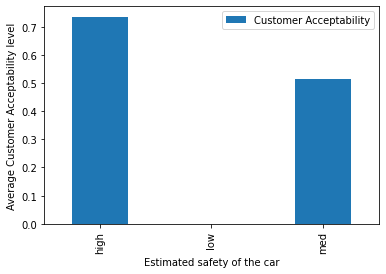

In [20]:
x=df[['Estimated safety of the car', 'Customer Acceptability']].groupby('Estimated safety of the car').mean()
plt= x.plot(kind='bar')

plt.set_xlabel('Estimated safety of the car')
plt.set_ylabel('Average Customer Acceptability level')  

In [21]:
df[['Estimated safety of the car', 'Customer Acceptability']].groupby('Estimated safety of the car').mean()

,Customer Acceptability
Estimated safety of the car,
high,0.736111
low,0.000000
med,0.515625


**Inferance:**
* Cars with low safety estimation, had zero customer acceptability level.
* Higher the estimated safety of the car, higher is the average customer acceptance level.

##**Preprocessing the Data for Analysis:**

##**Creating a categorical variables from the given variables of 'object' type:**

And since all the categories in the variables have a naturally increasing order, they can be converted to numbers (e.g. 1, 2, 3, 4, 5) preserving the order. These are called ordinals.

**Buying price:**

In [22]:
df['Buying price'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [23]:
df['Buying price'] = df['Buying price'].map({'low':1, 'med':2, 'high':3,'vhigh':4})

**Price of the maintenance:**

In [24]:
df['Price of the maintenance'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [25]:
df['Price of the maintenance'] = df['Price of the maintenance'].map({'low':1, 'med':2, 'high':3,'vhigh':4})

**Number of doors:**

In [26]:
df['Number of doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [27]:
df['Number of doors'] = df['Number of doors'].map({'2':1, '3':2, '4':3, '5more':4})

**Capacity:**

In [28]:
df['Capacity'].unique()

array(['2', '4', 'more'], dtype=object)

In [29]:
df['Capacity'] = df['Capacity'].map({'2':1, '4':2, 'more':3})

**The size of luggage boot:**

In [30]:
df['The size of luggage boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [31]:
df['The size of luggage boot'] = df['The size of luggage boot'].map({'small':1, 'med':2, 'big':3})

**Estimated safety of the car:**

In [32]:
df['Estimated safety of the car'].unique()

array(['low', 'med', 'high'], dtype=object)

In [33]:
df['Estimated safety of the car'] = df['Estimated safety of the car'].map({'low':1, 'med':2, 'high':3})

**CORRELATION MATRIX FOR THE DIFFERENT FEATURES IN THE DATA:**

In [34]:
corr_matrix = df.corr()

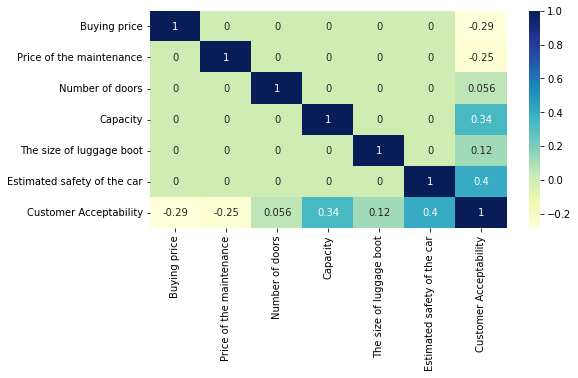

In [37]:
#Visualizing the correlation matrix using a heatmap in seaborn
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, cmap='YlGnBu',annot=True)

##**Decision Tree for Classification to predict Customer acceptability of Cars:**

###**Making the Training, Validation and Test Sets**
While building real-world machine learning models, it is quite common to split the dataset into three parts:

**Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

**Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_df, val_df = train_test_split(df, test_size=0.25, random_state=42)

In [40]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (1296, 7)
val_df.shape : (432, 7)


###**Identifying Input and Target Columns**
Let's create a list of input columns, and also identify the target column.

In [41]:
df.columns

Index(['Buying price', 'Price of the maintenance', 'Number of doors',
       'Capacity', 'The size of luggage boot', 'Estimated safety of the car',
       'Customer Acceptability'],
      dtype='object')

In [42]:
input_cols = ['Buying price', 'Price of the maintenance', 'Number of doors',
       'Capacity', 'The size of luggage boot', 'Estimated safety of the car']

In [43]:
target_col = 'Customer Acceptability'

In [49]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [50]:
X_train=train_inputs
y_train=train_targets
X_val=val_inputs
y_val=val_targets

#**Modelling**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [52]:
models = [LogisticRegression(),SVC(),LinearSVC(),DecisionTreeClassifier(),\
          RandomForestClassifier(n_estimators = 100),KNeighborsClassifier(10),\
         SGDClassifier(max_iter = 100, tol = None),Perceptron(max_iter = 100, tol = None),GaussianNB()]

In [53]:
models_list = ['Logistic Regression','Support Vector Machines','Linear Support Vector Machines',\
               'Decision Tree','Random Forest','k-Nearest Neighbours', 'Stochastic Gradient Descent',\
               'Perceptron','Naive Bayes']
accuracy_list = []

In [54]:
for i in models:
    i.fit(X_train,y_train)
    accuracy = round(100*i.score(X_val,y_val),2)
    print(str(i) + ' Accuracy {}%'.format(accuracy))
    accuracy_list.append(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression() Accuracy 81.48%
SVC() Accuracy 96.53%
LinearSVC() Accuracy 78.24%
DecisionTreeClassifier() Accuracy 97.45%
RandomForestClassifier() Accuracy 96.99%
KNeighborsClassifier(n_neighbors=10) Accuracy 90.74%
SGDClassifier(max_iter=100, tol=None) Accuracy 77.31%
Perceptron(max_iter=100, tol=None) Accuracy 75.46%
GaussianNB() Accuracy 68.52%


In [55]:
models_dataframe = pd.DataFrame({'Models': models_list,'Accuracy':accuracy_list})
models_dataframe.set_index('Models', inplace = True)
models_dataframe.sort_values(by = ['Accuracy'], ascending=False)

,Accuracy
Models,
Decision Tree,97.45
Random Forest,96.99
Support Vector Machines,96.53
k-Nearest Neighbours,90.74
Logistic Regression,81.48
Linear Support Vector Machines,78.24
Stochastic Gradient Descent,77.31
Perceptron,75.46
Naive Bayes,68.52


Thus it is inferred that Decision Tree and Random Forest is the best machine learning algorithm for the given dataset.

**Let us consider the Decision Tree model and try to further improve its accuracy...**

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier(random_state=42)

In [58]:
%%time
model.fit(X_train, train_targets)

CPU times: user 5.49 ms, sys: 833 µs, total: 6.32 ms
Wall time: 7.19 ms


DecisionTreeClassifier(random_state=42)

In [66]:
model.score(X_train, train_targets)

1.0

In [59]:
model.score(X_val, val_targets)

0.9722222222222222

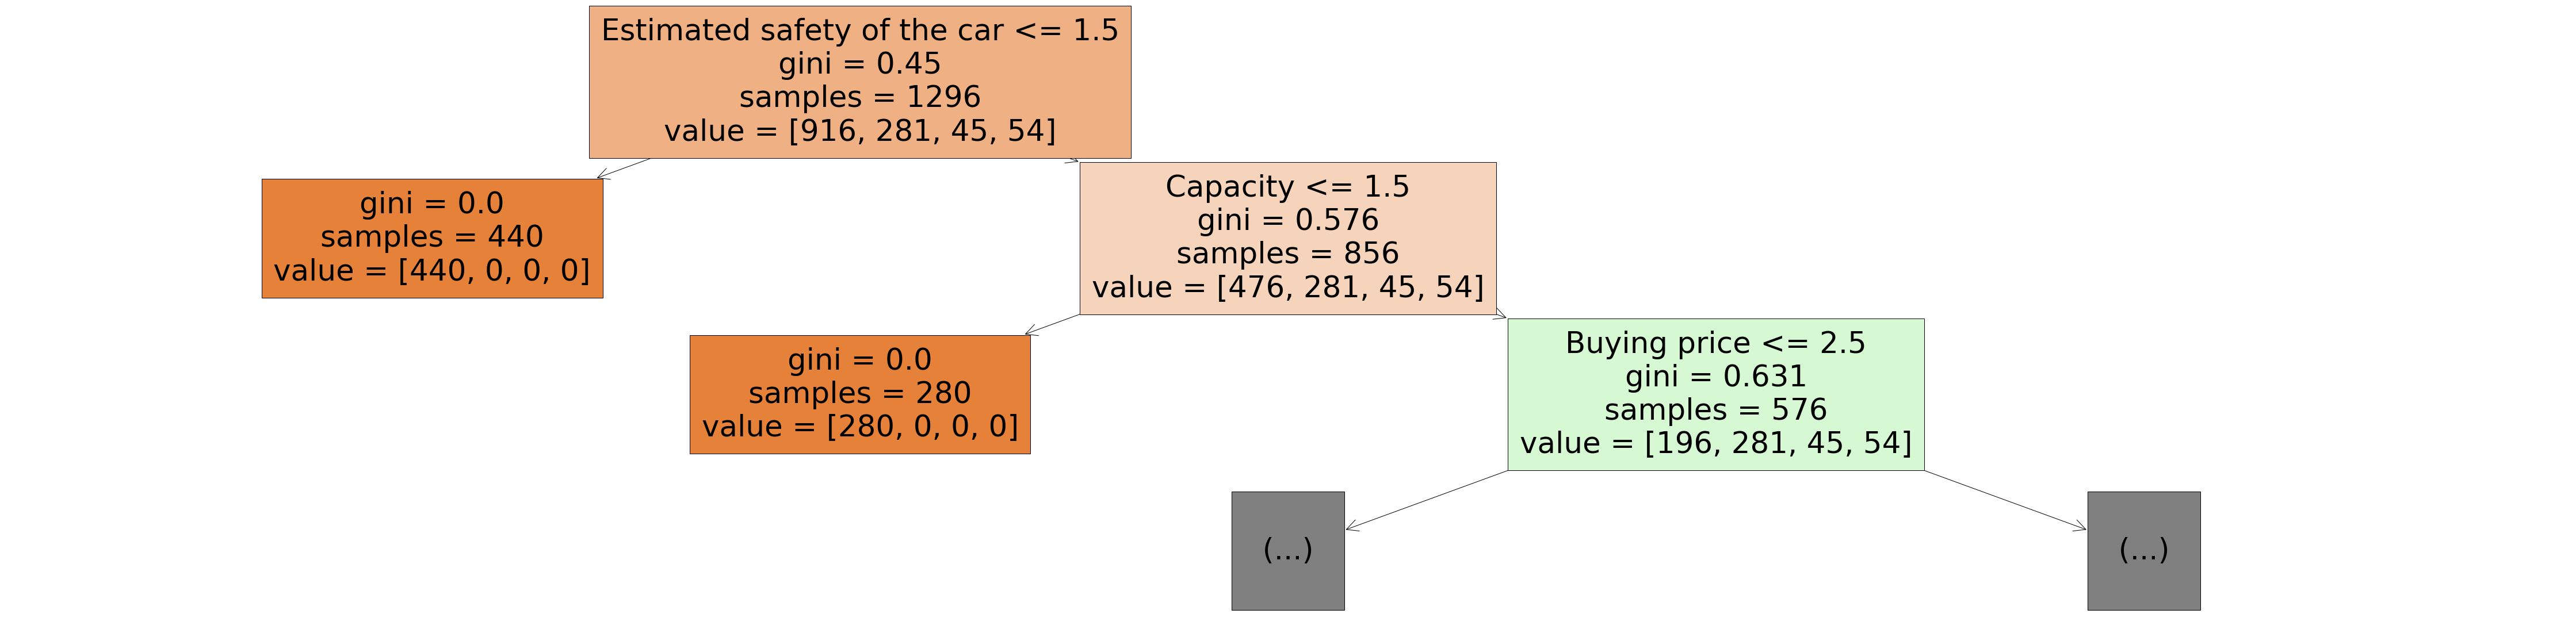

In [60]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [61]:
model.tree_.max_depth

12

In [62]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Estimated safety of the car <= 1.50
|   |--- class: 0
|--- Estimated safety of the car >  1.50
|   |--- Capacity <= 1.50
|   |   |--- class: 0
|   |--- Capacity >  1.50
|   |   |--- Buying price <= 2.50
|   |   |   |--- Price of the maintenance <= 2.50
|   |   |   |   |--- Estimated safety of the car <= 2.50
|   |   |   |   |   |--- The size of luggage boot <= 1.50
|   |   |   |   |   |   |--- Number of doors <= 1.50
|   |   |   |   |   |   |   |--- Capacity <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Capacity >  2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Number of doors >  1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- The size of luggage boot >  1.50
|   |   |   |   |   |   |--- Price of the maintenance <= 1.50
|   |   |   |   |   |   |   |--- Number of doors <= 1.50
|   |   |   |   |   |   |   |   |--- The size of luggage boot <= 2.50
|   |   |   |   |   |   |   |   |   |---

In [63]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [64]:
importance_df

,feature,importance
3,Capacity,0.256401
5,Estimated safety of the car,0.230413
1,Price of the maintenance,0.187667
4,The size of luggage boot,0.166251
0,Buying price,0.105102
2,Number of doors,0.054166


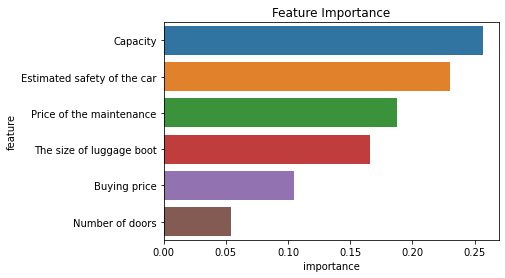

In [65]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#**Hyperparameter Tuning and Overfitting**
As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy wasnt 100%. **Let us check if this is due to overfitting of the data.**

In [67]:
?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

* max_depth
* max_leaf_nodes

###**max_depth**
By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which **may** lead to better generalization.

**Let's experiment with different depths and number of leaves using a helper function.**

In [72]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [78]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])

CPU times: user 127 ms, sys: 3.37 ms, total: 131 ms
Wall time: 131 ms


In [79]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.293210,0.319444
1,2,0.227623,0.206019
2,3,0.211420,0.199074
3,4,0.145833,0.159722
4,5,0.130401,0.122685
5,6,0.067130,0.060185
6,7,0.056327,0.074074
7,8,0.018519,0.053241
8,9,0.013117,0.046296
9,10,0.002315,0.027778


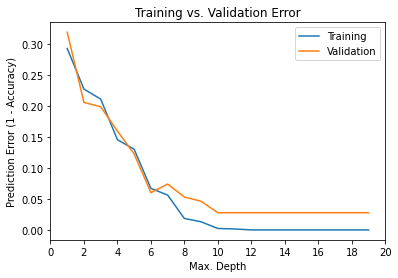

In [80]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

###**max_leaf_nodes**
Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [109]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(max_leaf_nodes=mln, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'max_leaf_nodes': mln, 'Training Error': train_acc, 'Validation Error': val_acc}

In [110]:
%%time
errors_df = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(2, 100)])

CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 612 ms


In [111]:
errors_df

,max_leaf_nodes,Training Error,Validation Error
0,2,0.293210,0.319444
1,3,0.227623,0.206019
2,4,0.211420,0.199074
3,5,0.154321,0.148148
4,6,0.145833,0.159722
...,...,...,...
93,95,0.000000,0.034722
94,96,0.000000,0.034722
95,97,0.000000,0.034722
96,98,0.000000,0.034722


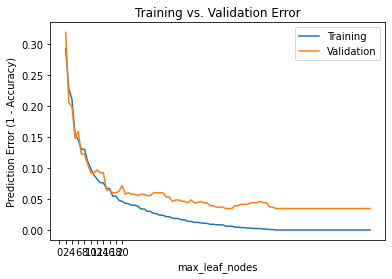

In [112]:
plt.figure()
plt.plot(errors_df['max_leaf_nodes'], errors_df['Training Error'])
plt.plot(errors_df['max_leaf_nodes'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('max_leaf_nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

**Looking at the two graphs, it is evident that there is no overfitting occuring in the model.** 

**It is hence evident that the Decision tree model with defaultly set parameters is the best model for this given dataset.**